<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [2]:
%matplotlib inline
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

# Integración numérica

**Meta:** Evaluar integrales desconocidos o de datos experimentales


$$ \int^b_a f(x) dx$$

### Metodología

Se quiere aproximar el integral $I$ con una aproximación $I_N$ de tal forma que:
$$
    I = \int^b_a f(x) dx \approx I_N = \sum^{N}_{i=1} w_i f(x_i)
$$
adonde $x_i$ son los *puntos de cuadratura* o *nodos* y $w_i$ son los *pesos*.  Normalmente una regla de cuadratura usa puntos específicos $x_i$ que tienen in peso definido $w_i$.

Convergencia se debería dar en el sentido que
$$
    \lim_{N \rightarrow \infty} I_N = I.
$$

### Fórmulas de integración de Newton-Cotes

Usando $N+1$ puntos uniformemente espaciados, evalua $f(x)$ en esos puntos e integra el polinomio aproximado de integración:

$$I_N[f] = \int^b_a P_N(x) dx$$

#### Regla del trapecio

La regla del trapecio utiliza un polinomio de grado $N = 1$ (una recta).

$$P_1(x) = p_1 ( x- x_i) + p_0$$

La regla del trapecio asume una relación lineal entre los puntos.  Los coeficientes del polinomio en un intervalo son:

$$p_0 = f(x_i) \quad \quad p_1 = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}$$

lo que define el polinomio como

$$P_1(x) = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} ( x- x_i) + f(x_i)$$

Integrando el polinomio se obtiene:

$$\begin{aligned}
    I_N[f] &= \int^b_a P_1(x) dx \\
    &= \int^{x_{i+1}}_{x_i} (p_0 + p_1 (x - x_i)) dx = \left . p_0 x + p_1 \left (\frac{x^2}{2} - x_i x\right) \right |^{x_{i+1}}_{x_i} \\
    &= p_0 \Delta x + p_1 \left (\frac{1}{2} (x_{i+1} + x_i) \Delta x - x_i \Delta x\right) \\
    &= f(x_i) \Delta x + (f(x_{i+1}) - f(x_i))\left (\frac{1}{2} (x_{i+1} + x_i) - x_i\right) \\
    &= f(x_i) \Delta x + (f(x_{i+1}) - f(x_i)) \frac{\Delta x}{2} \\
    & = \frac{\Delta x}{2} (f(x_{i+1}) + f(x_i))
\end{aligned}$$

Si tenemos mas de un intervalo para integrar se puede escribir la siguiente ecuación ya que todos los segmentos van a tener una contribución de $\Delta x$ a toda la suma menos el primero y el último:

$$
    I_N[f] = \frac{\Delta x}{2} (f(x_0) + f(x_N) ) + \sum^{N-1}_{j=1} \Delta x f(x_j)
$$

Esto se conoce como la **regla de trapecio de aplicación múltiple**.

#### Ejemplo: 

Calcule el integral cumulativo de la siguiente función:

$$
    \int^x_0 sin(\hat{x}) d\hat{x} = \left . -\cos \hat{x} \right|^x_0 = 1 - \cos x
$$

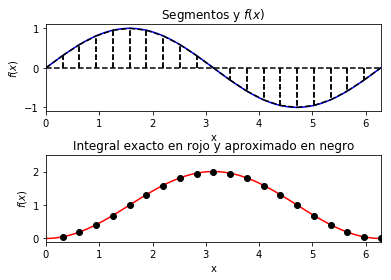

In [5]:
# El integral se calcula de 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

# Se utilizan 20 intervalos entre los límites
num_partitions = 20
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i+1])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_hat[i]), f(x_hat[i+1])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Segmentos y $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

# Aquí se calcula el integral númericamente con la regla del trapecio
I_hat = numpy.zeros(x_hat.shape)
I_hat[0] = (f(x_hat[1]) + f(x_hat[0])) * delta_x / 2.0
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x / 2.0
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral exacto en rojo y aproximado en negro")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

#### Ejercicio:

Cambie el número de segmentos y verifique como varia el integral aproximado en comparación al exacto.

#### Regla de Simpson

La regla de Simpson aproxima un polinomio de grado $N = 2$ entre los puntos.  

El polinomio tiene la forma:

$$P_2(x) = \frac{2 f(x_i)}{\Delta x^2} \left (x - \frac{\Delta x}{2} \right ) (x - \Delta x) - \frac{4 f\left(x_i + \frac{\Delta x}{2}\right)}{\Delta x^2}  x (x - \Delta x) + \frac{2 f(x_{i+1})}{\Delta x^2} x \left (x - \frac{\Delta x}{2} \right )$$

Integrando el polinomio se obtiene

$$
    I_N[f] = \int^{x_{i+1}}_{x_i} P_2(x) dx = \frac{\Delta x}{6} f(x_i) + \frac{2 \Delta x}{3} f\left(x_i + \frac{\Delta x}{2} \right ) + \frac{\Delta x}{6} f(x_{i+1})
$$

Demostración: Por el método de coeficientes indeterminados.  

Se usa la forma general de integración y se determinan los pesos $w_j$ con funciones de las cuales conocemos la solución. Estas funciones se pueden representar con polinomios hasta grado $N=2$ pero los más fáciles son $1$, $x$, $x^2$.

$$
    I_{\Delta x}[f] = w_0 f(0) + w_1 f(\Delta x / 2) + w_2 f(\Delta x)
$$

$$\begin{aligned}
    &\text{if}~f = 1:  &I[f] =  \int^{\Delta x}_{0} 1 dx = \Delta x & & I_N[1] &= w_0 + w_1 + w_2 \\
    &\text{if}~f = x:  &I[f] =  \int^{\Delta x}_{0} x dx = \frac{\Delta x^2}{2} & & I_N[x] &= w_1 \frac{\Delta x}{2} + w_2\Delta x\\
    &\text{if}~f = x^2:  &I[f] =  \int^{\Delta x}_{0} x^2 dx = \frac{\Delta x^3}{3} & & I_N[x^2] &= \frac{\Delta x^2}{4} w_1 + w_2\Delta x^2\\
\end{aligned}$$

Esto nos da un sistema de ecuaciones lineales:
$$\begin{aligned}
    w_0 &+& w_1 &+& w_2 &=\Delta x \\
        &\quad& \frac{\Delta x}{2} w_1 &+& \Delta x w_2  &= \frac{\Delta x^2}{2} \\
        &\quad& \frac{\Delta x^2}{4} w_1 &+& \Delta x^2 w_2 &=\frac{\Delta x^3}{6} \\
\end{aligned}$$

o

$$\begin{bmatrix}
    1 & 1 & 1 \\
    0 & \Delta x / 2 & \Delta x \\
    0 & \Delta x^2 / 4 & \Delta x^2 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x^2 / 2 \\ \Delta x^3 / 3
\end{bmatrix} \Rightarrow \begin{bmatrix}
    1 & 1 & 1 \\
    0 & 1 / 2 & 1 \\
    0 & 1 / 4 & 1 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x / 2 \\ \Delta x / 3
\end{bmatrix} \Rightarrow \begin{bmatrix}
    1 & 1 & 1 \\
    0 & 1 / 2 & 1 \\
    0 & 0 & -1 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x / 2 \\ -\Delta x / 6
\end{bmatrix}$$

cuya solución es 

$$ w_2 = \frac{\Delta x}{6} \quad w_1 = \frac{2}{3} \Delta x \quad w_0 = \frac{\Delta x}{6}$$

La regla de simpson también se puede escribir como un intervalo de tres puntos pero es más fácil de representar en una formulación en donde $\Delta x$ es la mitad del intervalo.

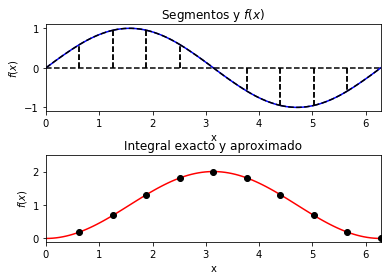

In [7]:
# El integral se calcula de 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i + 1])], 'k--')
    coeff = numpy.polyfit((x_hat[i], x_hat[i] + delta_x / 2.0, x_hat[i + 1]), 
                          (f(x_hat[i]), f(x_hat[i] + delta_x / 2.0), f(x_hat[i+1])), 2)
    x_star = numpy.linspace(x_hat[i], x_hat[i+1], 10)
    axes.plot(x_star, numpy.polyval(coeff, x_star), 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Segmentos y $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))


# Aquí se calcula el integral númericamente con la regla del Simpson
I_hat = numpy.zeros(x_hat.shape)
I_hat[0] = delta_x * (1.0 / 6.0 * (f(x_hat[0]) + f(x_hat[1])) + 2.0 / 3.0 * f(x_hat[0] + delta_x / 2.0))
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + delta_x * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x / 2.0))
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral exacto y aproximado")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

## Análisis del error en cada método

La fórmulas de integración númerica aproximan el integral por $I_N$ de la funciín $f$:
$$
    I_N[f] = \sum^{N-1}_{i=0} w_i f(x_i).
$$

El error $E[f]$ con respecto al valor exacto del integral $I[f]$ se define como

$$I[f] = I_N[f] + E_N[f]$$

El grado del polinomio usado para $I_N[f]$ se expresa por el número entero $N$ de tal forma que $E_N[p_i] = 0 \quad \forall i \leq n$.

### La exactidud de la integracón númerica

En base a los polinomios en la regla del trapecio y de simpson se puede definir el término remanente por el teorema de Lagrange para analizar el error

$$R_N(x) = (x - x_0)(x - x_1) \cdots (x- x_N) \frac{f^{(N+1)}(c)}{(N+1)!}$$

 en donde $f^{(N+1)}(c)$ es la derivada $N+1$ de la función a integrar.

Este puede ser integrado para determinar el error. 

$$I[f] = \sum_{i=0}^N \int^{x_{i+1}}_{x_i} P_N(x) dx + \sum_{i=0}^N \int^{x_{i+1}}_{x_i} R_N(x) dx = I_N[f] + E_N[f]$$



#### Error Regla de trapecio

Con $N=1$ se obtiene

$$R_1(x) = (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2}$$

e integrando este término remanent el error se obtiene como

$$\int^{x_{i+1}}_{x_i} (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2} dx = \frac{\Delta x^3}{12} f''(c)$$



El error total es la suma en todo el intervalo

$$E_N[f] = -\frac{\Delta x^3}{12} \sum_{i=0}^{N} f''(c_i)$$

o

$$E_N[f] = -\frac{1}{2} \Delta x^2 (b - a) \left [ \frac{1}{N} \sum^{N-1}_{i=0} f''(c_i) \right ]$$

en donde la expresión en el parentesis es el valor promedio de la segunda derivada en el intervalo $[a,b]$.  Esto muestra que el error disminuye en forma cuadratica en el límite $\Delta x \rightarrow 0$.

#### Error de Regla de Simpson

Para  $N = 2$ 

$$R_2(x) = (x - x_i) \left(x - x_i - \frac{\Delta x}{2} \right) (x - x_{i+1}) \frac{f'''(c)}{3!}$$

Integrando y sumando todas las contribuciones obtenemos

$$E_N[f] = -\frac{1}{180} (b - a) \Delta x^4 f^{(4)}(c)$$

Aquí se demuestra que se gano dos ordenens de magnitud mientras que el polinomio solo aumento en un grado!

##### Ejemplo 1:

Con $f(x) = \sin \pi x$ se compara la exactitud de la regla del trapecio y de Simpson en el intervalo $x\in[0,1]$.

$$\begin{aligned}
    \text{Exact:}  &I[f] = \int^1_0 \sin \pi x = \left . \frac{-\cos \pi x}{\pi} \right |^1_0 = \frac{2}{\pi} \approx 0.636619772 \\
    \text{Trapecio:}  &I_1[f] = \frac{\Delta x}{2} (\sin(0) + \sin(\pi)) = 0 \\
    \text{Simpson:}  &I_1[f] = \frac{\Delta x}{6} \sin(0) + \frac{2 \Delta x}{3} \sin(\pi / 2) + \frac{\Delta x}{6} \sin(\pi) = \frac{2 \Delta x}{3} = \frac{2}{3}
\end{aligned}$$

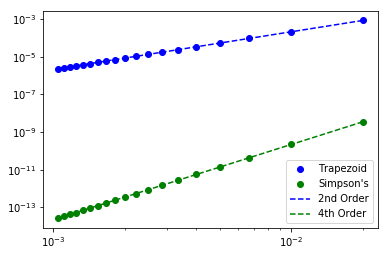

In [12]:
# Calculo del error en función del valor de delta_x para cada método
f = lambda x: numpy.sin(numpy.pi * x)

num_partitions = range(50, 1000, 50)
delta_x = numpy.empty(len(num_partitions))
error_trap = numpy.empty(len(num_partitions))
error_simpson = numpy.empty(len(num_partitions))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N + 1)
    delta_x[j] = x_hat[1] - x_hat[0]
 
    # Trapecio
    I_hat = 0.0
    for i in range(1, N):
        I_hat += (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x[j] / 2.0
    error_trap[j] = numpy.abs(I_hat - 2.0 / numpy.pi)
    
    # Simpson
    I_hat = 0.0
    for i in range(0, N):
        I_hat += delta_x[j] * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x[j] / 2.0))
    error_simpson[j] = numpy.abs(I_hat - 2.0 / numpy.pi)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, error_trap, 'bo', label="Trapezoid")
axes.loglog(delta_x, error_simpson, 'go', label="Simpson's")
axes.loglog(delta_x, order_C(delta_x[0], error_trap[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.loglog(delta_x, order_C(delta_x[0], error_simpson[0], 4.0) * delta_x**4.0, 'g--', label="4th Order")
axes.legend(loc=4)

plt.show()

## SciPy Integration Routines

SciPy has a number of integration routines that we have derived here including general purpose integrators that can control error.

In [8]:
import scipy.integrate as integrate
# integrate?

#### Con regla de trapecio

In [21]:
integrate.cumtrapz?

(-0.1, 2.5)

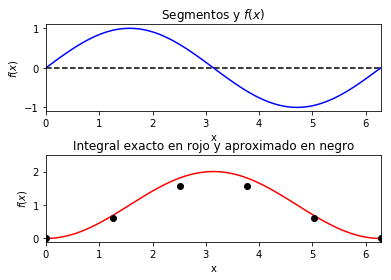

In [25]:
f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

# Se utilizan 20 intervalos entre los límites
num_partitions = 5
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Segmentos y $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

# Aquí se calcula el integral númericamente con la regla del trapecio
I_hat = integrate.cumtrapz(f(x_hat),x_hat,initial=0)
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral exacto en rojo y aproximado en negro")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

#### Con regla de Simpson

In [31]:
integrate.simps?

(-0.1, 2.5)

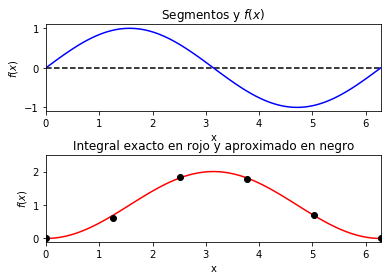

In [40]:
f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

# Se utilizan 20 intervalos entre los límites
num_partitions = 5
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Segmentos y $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

# Aquí se calcula el integral númericamente con la regla del trapecio
I_hat = numpy.zeros(x_hat.shape)
for i in range (1,len(x_hat)):
    I_hat[i-1] = integrate.simps(f(x_hat[0:i]),x=x_hat[0:i])
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral exacto en rojo y aproximado en negro")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))